## Assignment: Unsupervised and Reinforcement Learning

### Exercise 1: Destination reviews

Dataset with destination reviews published by 249 reviewers of holidayiq.com.

1. Use the k-means angorithm to cluster the reviews in 5 groups using all attributes except the ID. Run the algorithm 60 times with different centroid seeds and obtain the centroids. 
2. Identify the number of clusters using the silhouette analysis.

In [1]:
# Importing sklearn libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pandas as pd

In [2]:
# Reading data file into pandas dataframe
data = pd.read_csv("buddymove_holidayiq.csv") 
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [3]:
# Removing ID to prepare for clustering k-means algorithm
clust_data = data.iloc[:,1:]
clust_data.head()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86


In [4]:
# Using KMeans from scikit learn
from sklearn.cluster import KMeans

# From scikit learn documentation 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#    n_init : int, default: 10
#    Number of time the k-means algorithm will be run with different centroid seeds. 
#    The final results will be the best output of n_init consecutive runs in terms of inertia.

# As scikit learn documentation is stating, the k-means algorithm will be run using different centroid seeds
# The default is 10 times, but as the assignment indicates, we will be running the algorithm 60 times.

# Implementing KMeans (60 runs), with 5 clusters
km_alg = KMeans(n_clusters=5, n_init=60)

# Fitting model
km_alg.fit(clust_data)

# Predicting the clusters to which 
clust_result = km_alg.predict(clust_data)

clust_centroids = km_alg.cluster_centers_


#### 1. Use the k-means angorithm to cluster the reviews in 5 groups using all attributes except the ID. Run the algorithm 60 times with different centroid seeds and obtain the centroids. 

In [5]:
print("After running the algorithm 60 times, the best result yields the following centroids:")
print(clust_centroids)

After running the algorithm 60 times, the best result yields the following centroids:
[[  6.12631579  83.46315789 108.8        102.16842105  80.90526316
   94.65263158]
 [ 17.30357143 128.01785714 143.03571429 144.125      135.5
  140.33928571]
 [ 17.6744186   96.86046512 195.72093023 132.58139535  90.30232558
  147.44186047]
 [  7.         123.4137931   68.24137931  87.79310345 130.93103448
  100.4137931 ]
 [ 18.11538462 172.80769231  87.07692308 113.61538462 195.88461538
  149.11538462]]


In [6]:
# For the second question
# I will test different numbers of centroids

# List of centroids
n_centroids_list = [2,3,4,5,6,7,8,9]

# Looping through the list of possible centroids
for n_centroids in n_centroids_list:
    
    km_alg2 = KMeans(n_clusters=n_centroids, n_init=60)
    km_alg2.fit(clust_data)
    clust_result2 = km_alg2.predict(clust_data)

    silhouette_avg = silhouette_score(clust_data, clust_result2)
    
    print("Number of centroids: {}".format(n_centroids))
    print("The average silhouette_score is: {}".format(silhouette_avg))

Number of centroids: 2
The average silhouette_score is: 0.30794264630855106
Number of centroids: 3
The average silhouette_score is: 0.3492187864800945
Number of centroids: 4
The average silhouette_score is: 0.3422572691507888
Number of centroids: 5
The average silhouette_score is: 0.2998602529518383
Number of centroids: 6
The average silhouette_score is: 0.30573364659246544
Number of centroids: 7
The average silhouette_score is: 0.2871224125532542
Number of centroids: 8
The average silhouette_score is: 0.30513890161635987
Number of centroids: 9
The average silhouette_score is: 0.30756485845839027


For n_clusters = 2 The average silhouette_score is : 0.3079416087641895
For n_clusters = 3 The average silhouette_score is : 0.3492187864800945
For n_clusters = 4 The average silhouette_score is : 0.3422572691507888
For n_clusters = 5 The average silhouette_score is : 0.28964374748052757
For n_clusters = 6 The average silhouette_score is : 0.3033195913592543
For n_clusters = 7 The average silhouette_score is : 0.2807053525003885
For n_clusters = 8 The average silhouette_score is : 0.3054187605036031
For n_clusters = 9 The average silhouette_score is : 0.2966647633370138


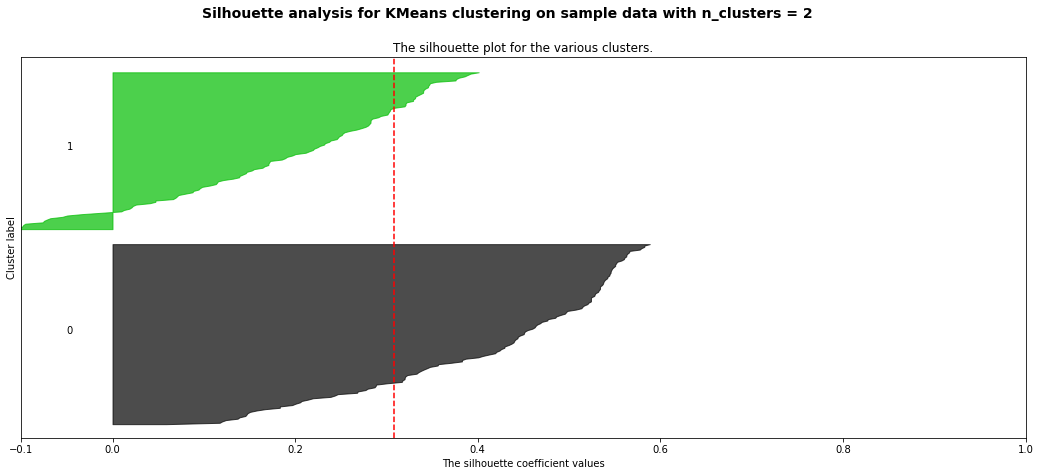

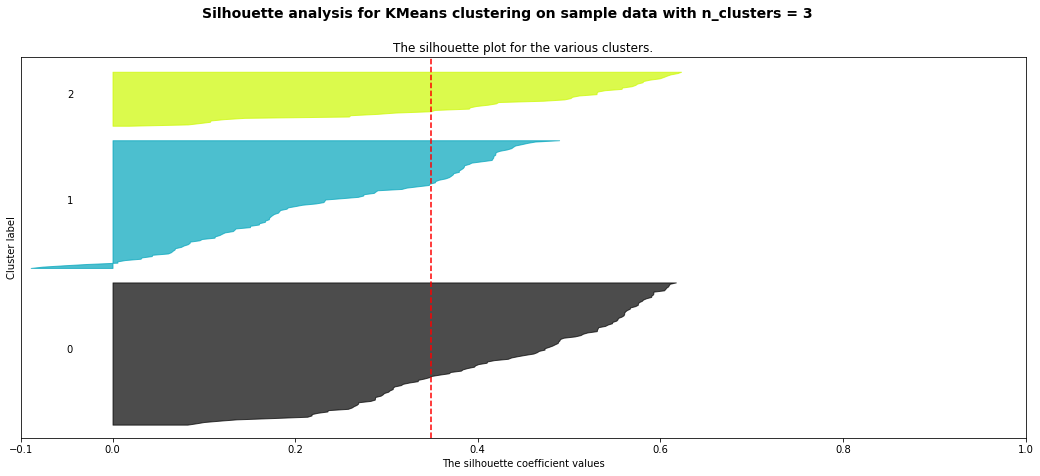

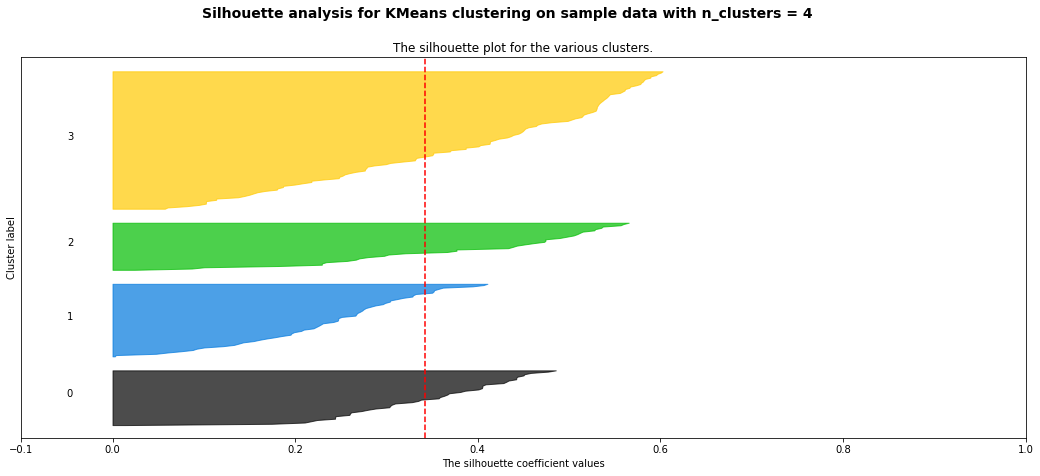

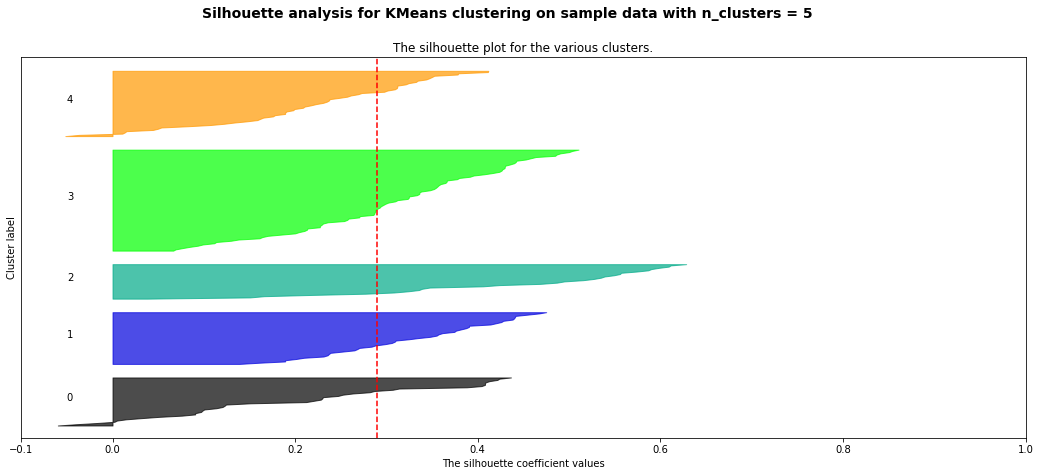

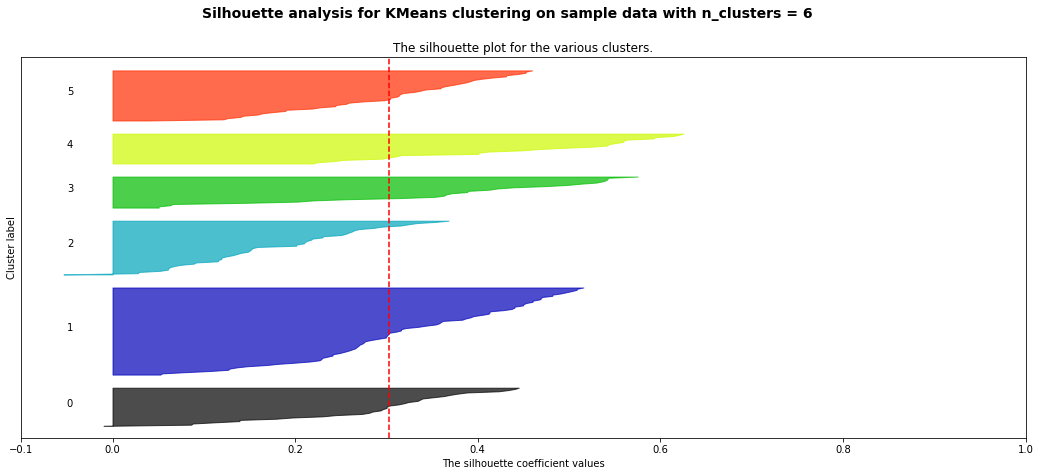

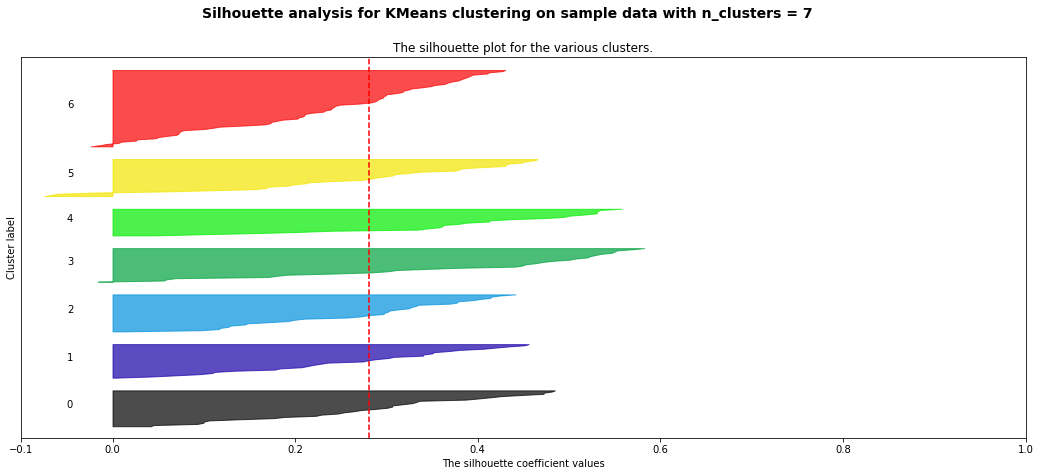

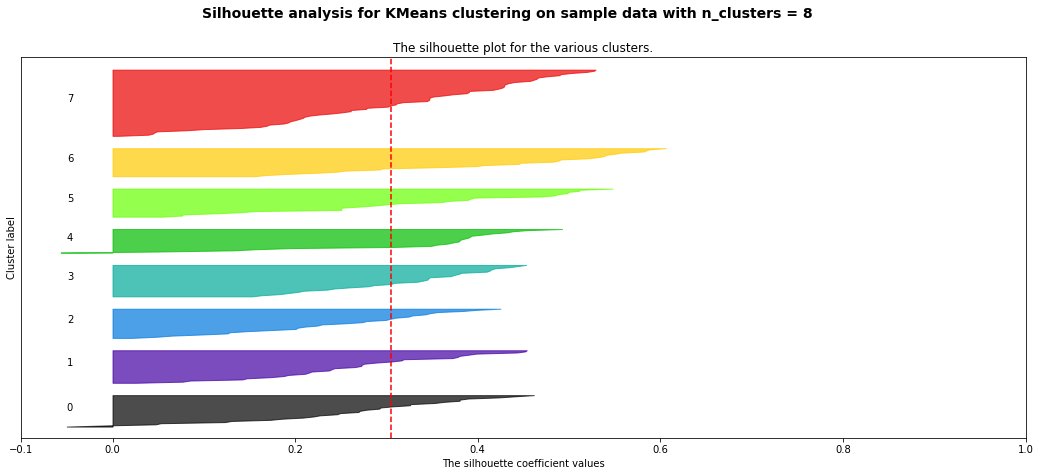

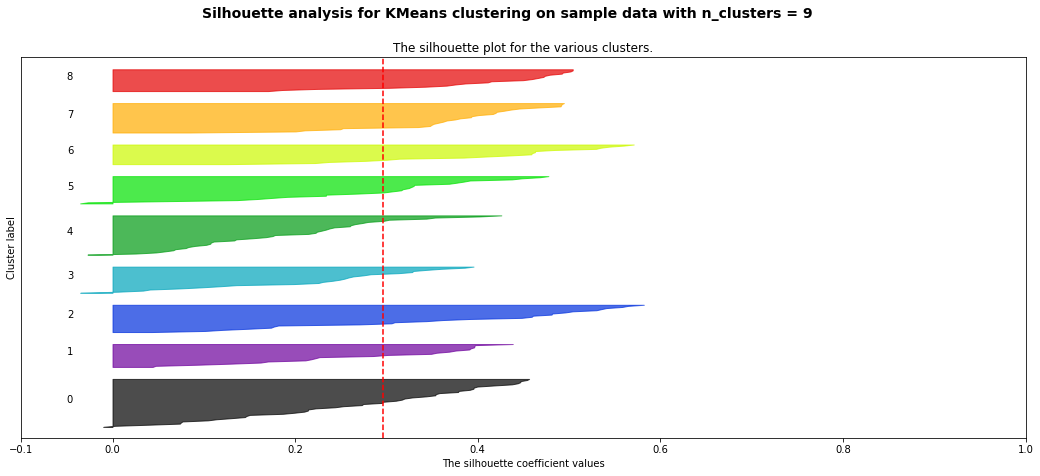

In [7]:
X = clust_data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

# From sklearn documentation
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

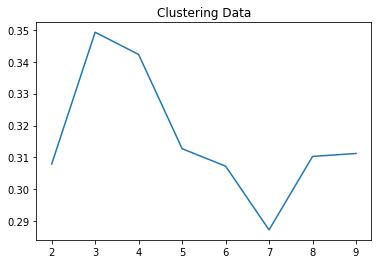

In [8]:
def plot_sillhouette(clust_data, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(clust_data)
        sillhouette_avgs.append(silhouette_score(clust_data, kmean.labels_))
        
    plt.plot(range(2, max_k), sillhouette_avgs)
    plt.title(figure_name)

plot_sillhouette(clust_data, 'Clustering Data')


#### 2. Identify the number of clusters using the silhouette analysis.

The silhouette analaysis was completed by calculating the average silhouette score using sklearn.
By printing the average score, for three clusters the score is slightly higher, although the difference is small. We can also use graphs as indicated in the sklearn documentation, where we obtain the average score (red vertical line). For the case of 3 clusters we can see that all 3 clusters are above the average. Although the size of the clusters is not even through the three clusters. Finally we make a chart with the average silhouette score from 1 to 9 clusters, and here we can see that the higher point is 3, as was determined when we printed the averages, but in the graph it's clearer.

Taking this into account, from the silhouette analysis, the ideal number of clusters would be 3.

### Exercise 2: Dynamic Programming

In OpenAI GYM load the environment "FrozenLake8x8-v0". Using dynamic programming obtain the value function and the optimal policy in this game. 

1. Obtain the value function 
2. Obtain the optimal policy

In [9]:
%pylab
%matplotlib inline

import time 
import seaborn as sns
import gym

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [10]:
# To make the the environment
# 8x8 map is selected
# The default value is a slippery environment
# I am including it in the definition to make this clear
env = gym.make("FrozenLake-v0", map_name='8x8')

env.reset()  # Initial state of the environment (Starting point)
env.render() # Show the map with current status


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


#### Legend to read map render

- S: starting point
- G: goal
- F: solid ice, where the agent can stand
- H: hole where the agent cannot fall


#### Moves 
Moves are represented in the environment as integers.

* 0: left
* 1: down
* 2: right
* 3: up

The episode ends when the agent reach the goal or fall in a hole. The agent receive a reward of 1 if it reach the goal, and zero otherwise.

In [11]:
env.reset()

# Done will be True once the agent dies (H) or reaches the goal (G)
done = False  

# Executing random movements just to see them on the map
while not done:
    observation, reward, done, info = env.step(1)
    
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


The agent's movements are not deterministic.
The final result of a state transition (the movement) does not depend entirely on the action taken.

#### Value Iteration

In [12]:
# Defining the function to iterate the value function (from session code)
def value_iteration(env, gamma=1, max_iter=10000, convergence=1e-8):
    V = np.zeros(env.observation_space.n)

    for iterations in range(max_iter):
        old_V = np.copy(V) 

        for state in range(env.observation_space.n):
            Q = []
            max_reward = 0
            for action in range(env.action_space.n):
                reward = 0
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    reward += (trans_prob * (reward_prob + gamma * old_V[next_state]))
                
                max_reward = max(reward, max_reward)
                #if reward > max_reward:
                #    max_reward = reward

            V[state] = max_reward 

        if (np.sum(np.fabs(old_V - V)) <= convergence):
            print ('Value function converged in %d iterations.' %(iterations+1))
            break
            
            
    return V

In [13]:
# Iterating through value function

START_TIME = time.time()
V = value_iteration(env)
END_TIME = time.time()

PROCESSING_TIME = END_TIME-START_TIME

print("Processing time for value function iteration was: {:f} s".format(PROCESSING_TIME))

Value function converged in 1285 iterations.
Processing time for value function iteration was: 1.446710 s


#### 1. Obtain the value function 

In [14]:
V_dp = V
V_dp

array([0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999998, 0.97820162, 0.9264305 , 0.        ,
       0.85661767, 0.94623162, 0.9820772 , 0.99999999, 0.99999997,
       0.93460488, 0.8010899 , 0.47490376, 0.62362139, 0.        ,
       0.9446776 , 1.        , 0.99999996, 0.82561305, 0.54223432,
       0.        , 0.53934275, 0.61118923, 0.85195561, 1.        ,
       0.99999995, 0.        , 0.        , 0.16804079, 0.38321762,
       0.44226933, 0.        , 1.        , 0.99999995, 0.        ,
       0.19467346, 0.12090475, 0.        , 0.33240114, 0.        ,
       1.        , 0.99999995, 0.73155778, 0.46311562, 0.        ,
       0.27746705, 0.55493409, 0.77746705, 0.        ])

Value Function using Dynamic Programming


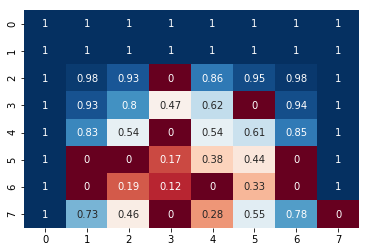

In [15]:
V_dp = V
print("Value Function using Dynamic Programming")

sns.heatmap(V_dp.reshape(8,8),  cmap="RdBu", annot=True, cbar=False)
plt.show()

In [16]:
# Function to extract the policy that corresponds to the iterated value function

def extract_policy(env, V, gamma=1):
    policy = np.zeros(env.observation_space.n)

    for state in range(env.observation_space.n):
        Q = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q[action] += (trans_prob * (reward_prob + gamma * V[next_state]))
        policy[state] = np.argmax(Q)

    print(policy)
    
extract_policy(env, V)

[3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 2. 0. 0. 0. 0. 2. 3. 3. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]


#### Policy iteration

In [17]:
# Function to calculate the value function
def compute_value_function(policy, gamma=1.0, convergence=1e-8):
    V = np.zeros(env.nS)
    old_V = np.ones(env.nS)
    
    while np.sum((np.fabs(old_V - V))) > convergence:
        old_V = np.copy(V)
        V = np.zeros(env.nS)
        for state in range(env.nS):
            action = policy[state]
            for trans_prob, next_state, reward_prob, _ in env.P[state][action]:
                V[state] += trans_prob * (reward_prob + gamma * old_V[next_state])
            
    return V

# Funciton to extract policy from a value function 
def extract_policy(V, gamma = 1.0):
    policy = np.zeros(env.observation_space.n)
    
    for state in range(env.observation_space.n):
        Q = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q[action] += (trans_prob * (reward_prob + gamma * V[next_state]))
        policy[state] = np.argmax(Q)
    
    return policy

# Function to iterate policy
def policy_iteration(env, gamma=1.0, max_iter=1000):
    policy = np.zeros(env.observation_space.n) 

    for iterations in range(max_iter):
        value_function = compute_value_function(policy, gamma)
        new_policy = extract_policy(value_function, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged in %d iterations.' %(iterations+1))
            break
        policy = new_policy
    return new_policy

In [18]:
# obtaining the optimal policy by iterating the policy function taking the value function

START_TIME = time.time()
optimal_policy = policy_iteration(env)
END_TIME = time.time()

PROCESSING_TIME = END_TIME-START_TIME

print("Processing time for policy iteration was: {:f} s".format(PROCESSING_TIME))

print("\n")

print("Optimal policy")
print(optimal_policy)

Policy-Iteration converged in 13 iterations.
Processing time for policy iteration was: 4.089534 s


Optimal policy
[3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 2. 0. 0. 0. 0. 2. 3. 3. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]


In [19]:
# Obtaining the value function of the optimal policy (for heatmaps of the environment)
value_f_optimal_policy = compute_value_function(optimal_policy)

#### Vale funtion for the optimal policy

In [20]:
# Manually recreating the environment of Frozen Lake v0 8x8
# this is so I can illustrate the map with colors that indicate start, goal, ice, and holes
map_list = ['S','F','F','F','F','F','F','F',
            'F','F','F','F','F','F','F','F',
            'F','F','F','H','F','F','F','F',
            'F','F','F','F','F','H','F','F',
            'F','F','F','H','F','F','F','F',
            'F','H','H','F','F','F','H','F',
            'F','H','F','F','H','F','H','F',
            'F','F','F','H','F','F','F','G']

map_n_list = [None] * 8 * 8

# Assigning values to each of the letters so they look different in the heatmap
for i in range(0, len(map_n_list)):
    if map_list[i] == 'S': map_n_list[i] = 1
    if map_list[i] == 'G': map_n_list[i] = 1
    if map_list[i] == 'F': map_n_list[i] = 0.85
    if map_list[i] == 'H': map_n_list[i] = 0

# Converting to array so I can create a heatmap, and reshaping with the environment's shape
map_arr = np.array(map_n_list).reshape(8,8)

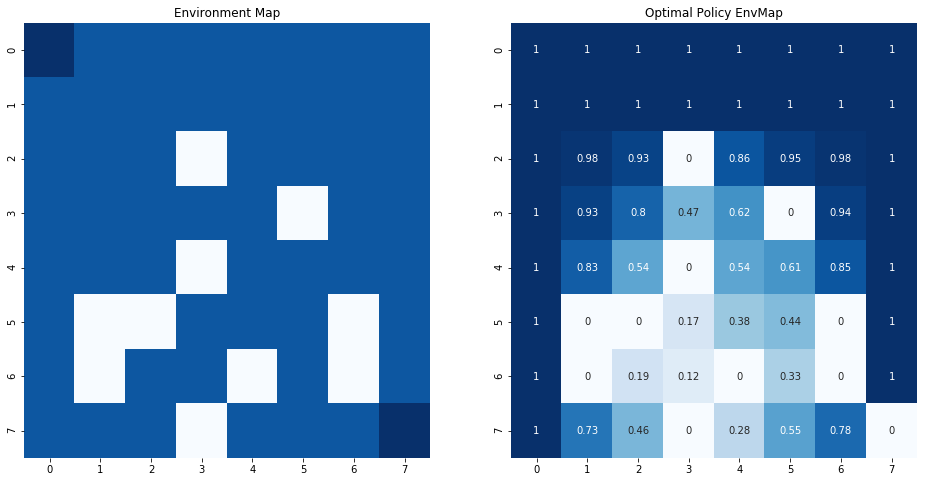

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plotting the environment as a heatmap,
ax[0].set_title("Environment Map")
sns.heatmap(map_arr,  cmap="Blues", cbar=False, ax=ax[0])

# Plotting the value function for the optimal policy
ax[1].set_title("Optimal Policy EnvMap")
sns.heatmap(value_f_optimal_policy.reshape(8,8),  cmap="Blues", annot=True, cbar=False, ax=ax[1])

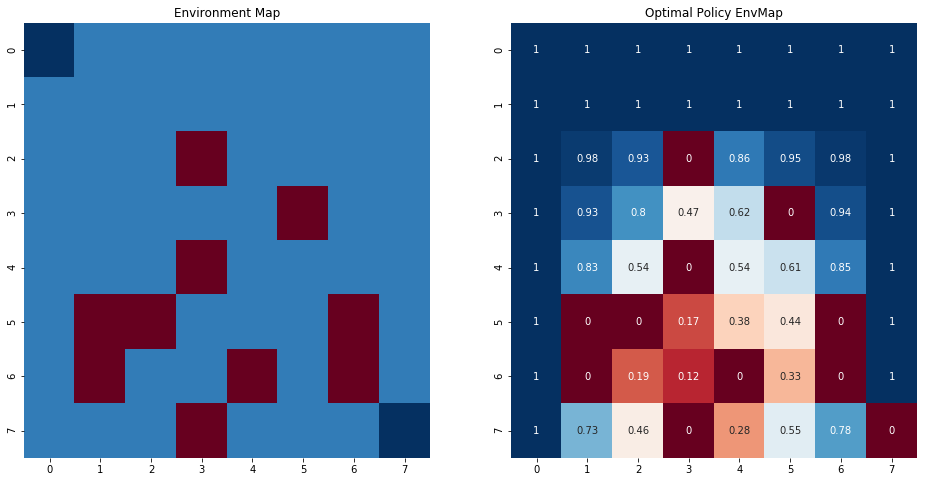

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Same as above, but this time using RED to signal the holes where the game ends
ax[0].set_title("Environment Map")
sns.heatmap(map_arr,  cmap="RdBu", cbar=False, ax=ax[0])

# Same as above, but now using a different palette so value function values are in red instead of white
ax[1].set_title("Optimal Policy EnvMap")
sns.heatmap(value_f_optimal_policy.reshape(8,8),  cmap="RdBu", annot=True, cbar=False, ax=ax[1])

#### 2. Obtain the optimal policy

In [23]:
optimal_policy_dp = optimal_policy
print("Optimal policy obtained using Dynamic Programming")
optimal_policy_dp

Optimal policy obtained using Dynamic Programming


array([3., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 0.,
       0., 0., 0., 2., 3., 3., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 2., 1., 0.])

### Exercise 3: Monte Carlo

In OpenAI GYM load the environment "FrozenLake8x8-v0". Use Monte Carlo method to solve the game.

1. Obtain the value function 
2. Obtain the optimal policy

In [139]:
import random

In [140]:
print("Observation space goes from 0 to {}. {} states.".format(env.observation_space.n-1, env.observation_space.n))
print("Action space goes from 0 to {}. {} actions.".format(env.action_space.n-1, env.action_space.n))

Observation space goes from 0 to 63. 64 states.
Action space goes from 0 to 3. 4 actions.


In [141]:
def init_v_returns(env):
    V = {}
    returns = {}
    states = range(0, env.observation_space.n)
    for s in states:
        V[s] = 0
        returns[s] = []

    return V, returns

In [142]:
# Function to create a random policy

def random_policy(env):
    policy = {}
    
    # range of the observation space goes from 0 to 63
    for s in range(0, env.observation_space.n):
        # range of the action space goes from 0 to 3
        policy[s] = np.random.choice(range(0, env.action_space.n))
        
    return policy

In [143]:
def play_game(env, policy, gamma=0.9):
    env.reset()
    episode = []
    
    s = env.env.s
    
    states_and_rewards = [(s, 0)]
    
    done = False
    
    while not done:
    
        a = policy[s]
        a = np.random.choice(range(0, env.action_space.n))
        
        # movement - action
        observation, reward, done, info = env.step(a)
        # getting the state after the movement
        s = env.env.s
        
        states_and_rewards.append((s, reward))
        
    # calculation of the returns, the value of the terminal state is 0 by definition
    G = 0
    states_and_returns = []
    first = True
    
    for s, r in reversed(states_and_rewards):
        if first:
            first = False
        else:
            states_and_returns.append((s, G))
    
        G = r + gamma * G
        
    states_and_returns.reverse()
    
    return states_and_returns

In [144]:
V, returns = init_v_returns(env)

policy = dict(enumerate(optimal_policy_dp, 0))

for t in range(10000):
    states_and_returns = play_game(env, policy)
    seen_states = set()
    for s, G in states_and_returns:
        # Only evaluating first time its seen
        if s not in seen_states:
            returns[s].append(G)
            V[s] = np.mean(returns[s])
            seen_states.add(s)
            

Value Function using Monte Carlo ES


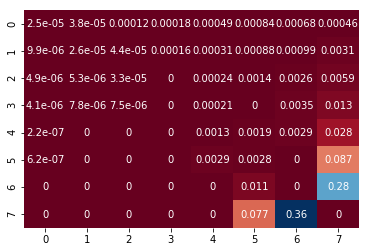

In [145]:
V_mc = np.array(list(V.values()))

print("Value Function using Monte Carlo ES")

sns.heatmap(V_mc.reshape(8,8),  cmap="RdBu", annot=True, cbar=False)
plt.show()

In [146]:
policy_mc = np.array(list(policy.values()))
print("Optimal policy obtained using Monte Carlo")
policy_mc

Optimal policy obtained using Monte Carlo


array([3., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 0.,
       0., 0., 0., 2., 3., 3., 2., 0., 0., 0., 1., 0., 0., 2., 2., 0., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 2., 1., 0.])

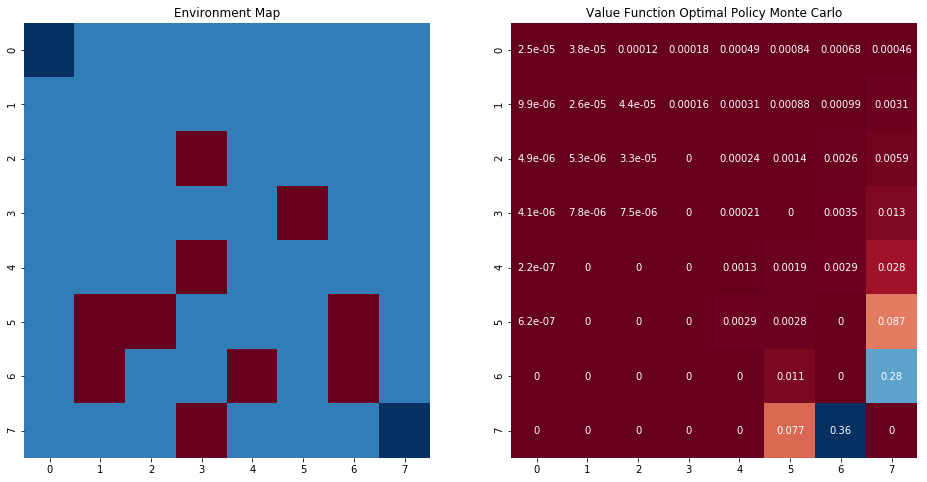

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

ax[0].set_title("Environment Map")
sns.heatmap(map_arr,  cmap="RdBu", cbar=False, ax=ax[0])

ax[1].set_title("Value Function Optimal Policy Monte Carlo")
sns.heatmap(V_mc.reshape(8,8),  cmap="RdBu", annot=True, cbar=False, ax=ax[1])
plt.show()

In [148]:
def play_game_es(env, policy, gamma=0.9):
    env.reset()
    episode = []
    
    s = env.env.s
    
    # the first action is random
    a = np.random.choice(range(0, env.action_space.n))
    
    # a tiplet of states, actions and rewards is created
    states_actions_rewards = [(s, a, 0)]
    seen_states = set()
    seen_states.add(env.env.s)
    num_steps = 0
    
    done = False

    while not done:
        # movement - action
        observation, reward, done, info = env.step(a)
        num_steps += 1
        # getting the state after the movement
        s = env.env.s
        
        if s in seen_states:
            # in order not to end up in an infinite episode this penalty is added for falling on H
            rew = -10.0/num_steps
            states_actions_rewards.append((s, None, rew))
            break
        elif done:
            states_actions_rewards.append((s, None, reward))
            break
        else: 
            a = policy[s]
            states_actions_rewards.append((s, a, reward))

        seen_states.add(s)
        
    # calculation of the returns, the value of the terminal state is 0 by definition
    G = 0
    states_actions_returns = []
    first = True
    
    for s, a, r in reversed(states_actions_rewards):
        if first:
            first = False
        else:
            states_actions_returns.append((s, a, G))
    
        G = r + gamma * G
        
    states_actions_returns.reverse()
    
    return states_actions_returns

In [149]:
def max_dict(d):
    max_key = None
    max_val = float('-inf')
    for k, v in d.items():
        if v > max_val:
            max_val = v
            max_key = k
    return max_key, max_val

In [150]:
def init_q_returns(env):
    Q = {}
    returns = {}
    states = range(0, env.observation_space.n)
    
    for s in states:
        if s in range(0, env.observation_space.n):
            Q[s] = {}
            for a in range(0, env.action_space.n):
                Q[s][a] = 0
                returns[(s, a)] = []
        else:
            pass

    return Q, returns

In [151]:
#policy2 = random_policy(env)
#policy2

In [152]:
env = gym.make("FrozenLake-v0", map_name='8x8')

env.reset()  # Initial state of the environment (Starting point)
env.render() # Show the map with current status

policy = random_policy(env)



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [153]:
policy = policy

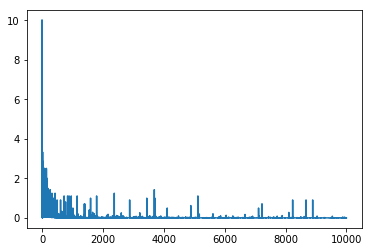

Processing time for monte carlo es iteration was: 2.472385 s


In [154]:
START_TIME = time.time()

Q, returns = init_q_returns(env)

deltas = []
for t in range(10000):
    biggest_change = 0
    states_actions_returns = play_game_es(env, policy)
    seen_state_action_pairs = set()
    for s, a, G in states_actions_returns:
        sa = (s, a)
        if sa not in seen_state_action_pairs:
            old_q = Q[s][a]
            returns[sa].append(G)
            Q[s][a] = np.mean(returns[sa])
            biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
            seen_state_action_pairs.add(sa)
    deltas.append(biggest_change)

    for s in policy.keys():
        policy[s] = max_dict(Q[s])[0]

plt.plot(deltas)
plt.show()

# Obtain V
V = {}
for s, Qs in Q.items():
    V[s] = max_dict(Q[s])[1]

    
    
END_TIME = time.time()

PROCESSING_TIME = END_TIME-START_TIME

print("Processing time for monte carlo es iteration was: {:f} s".format(PROCESSING_TIME))

#### 1.1 Obtain the value function - Monte Carlo ES

Value Function using Monte Carlo ES


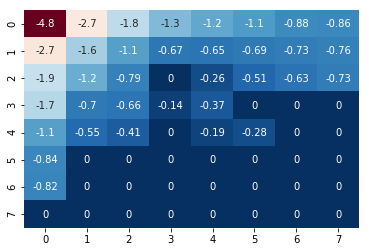

In [155]:
V_mc_es = np.array(list(V.values()))

print("Value Function using Monte Carlo ES")

sns.heatmap(V_mc_es.reshape(8,8),  cmap="RdBu", annot=True, cbar=False)
plt.show()

#### 2.1 Obtain the optimal policy - Monte Carlo ES

In [156]:
policy_mc_es = np.array(list(policy.values()))
print("Optimal policy obtained using Monte Carlo ES")
policy_mc_es

Optimal policy obtained using Monte Carlo ES


array([2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2,
       1, 2, 0, 1, 2, 2, 1, 0, 3, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

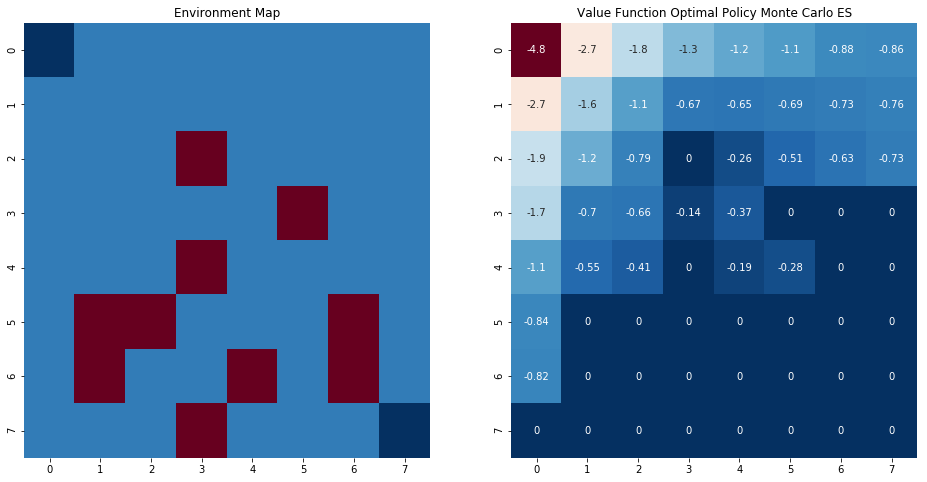

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

ax[0].set_title("Environment Map")
sns.heatmap(map_arr,  cmap="RdBu", cbar=False, ax=ax[0])

ax[1].set_title("Value Function Optimal Policy Monte Carlo ES")
sns.heatmap(V_mc_es.reshape(8,8),  cmap="RdBu", annot=True, cbar=False, ax=ax[1])
plt.show()

In [158]:
def play_game_no_es(grid, policy,  windy=0.1,gamma=0.9):
    # The game starts in a known state
    env.reset()
    s = env.env.s
    a = np.random.choice(range(0, env.action_space.n))

    # Now each triplet is s(t), a(t), r(t)
    # r(t) is obtained from the action a(t-1) of s(t-1) and arrive at s(t)
    states_actions_rewards = [(s, a, 0)]
    while True:
        observation, r, done, info = env.step(a)
        s = env.env.s
        
        if done:
            states_actions_rewards.append((s, None, r))
            break
        else:
            a = np.random.choice(range(0, env.action_space.n))
            states_actions_rewards.append((s, a, r))

    # Calculation of the returns, the value of the terminal state is 0 by definition
    G = 0
    states_actions_returns = []
    first = True
    for s, a, r in reversed(states_actions_rewards):
        # It must ignore the first state and the last G since it does not correspond
        # to any movement
        if first:
            first = False
        else:
            states_actions_returns.append((s, a, G))
        G = r + gamma*G

    # The states are rearranged
    states_actions_returns.reverse()

    return states_actions_returns

In [159]:
policy = random_policy(env)

# Q(s,a) and returns are initialized
Q = {}
returns = {}
states = range(0, env.observation_space.n)
for s in states:
    if s in range(env.observation_space.n):
        Q[s] = {}
        for a in range(env.action_space.n):
            Q[s][a] = 0
            returns[(s,a)] = []
    else:
        pass


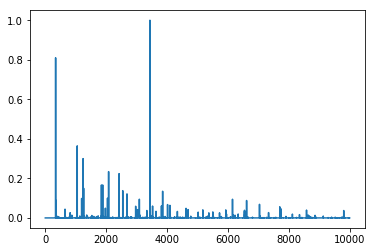

Processing time for monte carlo no es iteration was: 22.440792 s


In [160]:
START_TIME = time.time()

deltas = []
for t in range(10000):
    # A new episode is generated using pi
    biggest_change = 0
    states_actions_returns = play_game_no_es(env, policy)

    # Calculo de Q(s,a)
    seen_state_action_pairs = set()
    
    for s, a, G in states_actions_returns:
        # Check if s has already visited
        # The evaluation is done only in the first visit
        sa = (s, a)
        if sa not in seen_state_action_pairs:
            old_q = Q[s][a]
            returns[sa].append(G)
            Q[s][a] = np.mean(returns[sa])
            biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
            seen_state_action_pairs.add(sa)
            
    deltas.append(biggest_change)

    # calculate the new policy pi(s) = argmax[a]{ Q(s,a) }
    for s in policy.keys():
        a, _ = max_dict(Q[s])
        policy[s] = a

plt.plot(deltas)
plt.show()

# Locate the optimal status value function
# V(s) = max[a]{ Q(s,a) }
V = {}
for s in policy.keys():
    V[s] = max_dict(Q[s])[1]
    
END_TIME = time.time()

PROCESSING_TIME = END_TIME-START_TIME

print("Processing time for monte carlo no es iteration was: {:f} s".format(PROCESSING_TIME))


#### 1.2 Obtain the value function - Monte Carlo without ES

Value Function using Monte Carlo without ES


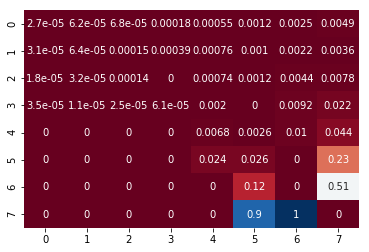

In [161]:
V_mc_no_es = np.array(list(V.values()))

print("Value Function using Monte Carlo without ES")

sns.heatmap(V_mc_no_es.reshape(8,8),  cmap="RdBu", annot=True, cbar=False)
plt.show()

#### 2.2 Obtain the optimal policy - Monte Carlo without ES

In [162]:
policy_mc_no_es = np.array(list(policy.values()))
print("Optimal policy obtained using Monte Carlo without ES")
policy_mc_no_es

Optimal policy obtained using Monte Carlo without ES


array([1, 2, 1, 3, 0, 2, 0, 1, 2, 2, 2, 3, 3, 2, 0, 1, 3, 1, 2, 0, 3, 1,
       3, 2, 2, 1, 3, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0])

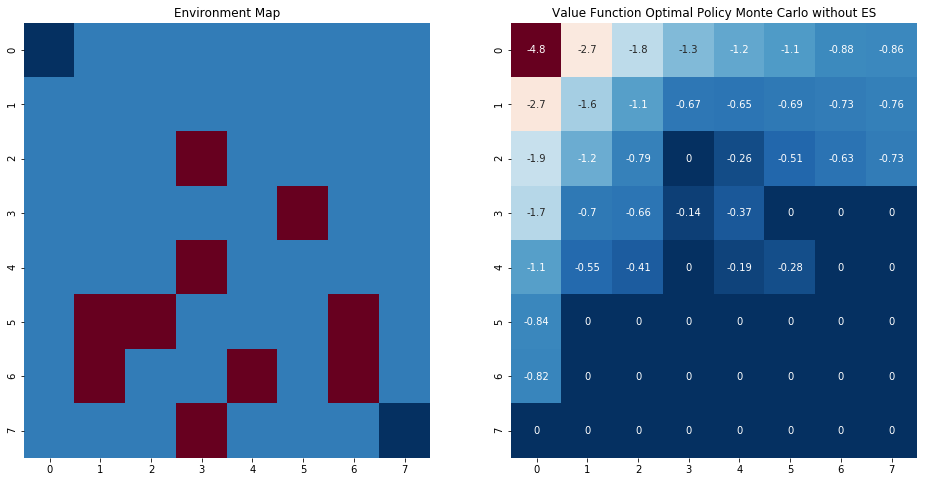

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

ax[0].set_title("Environment Map")
sns.heatmap(map_arr,  cmap="RdBu", cbar=False, ax=ax[0])

ax[1].set_title("Value Function Optimal Policy Monte Carlo without ES")
sns.heatmap(V_mc_es.reshape(8,8),  cmap="RdBu", annot=True, cbar=False, ax=ax[1])
plt.show()